In [166]:
import pandas as pd
import numpy as np
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt

In [167]:
df = pd.read_csv("train.csv")
asm_test = pd.read_csv('assignment-test.csv')

asm_test.head()

,index,EA1,EA2,EA3,EA4,EA5,EA6
0,17354,-0.534913,0.550684,4.017561,3.254904,-0.919559,0.76
1,17355,-0.385155,0.831352,1.340407,-0.006471,-0.303723,91.93
2,17356,-0.412335,0.615746,-2.358232,-1.259382,2.783729,20.00
3,17357,2.012686,-0.158270,-1.064652,0.062409,0.073092,44.03
4,17358,-0.695848,-1.511682,1.489886,-1.733270,-1.767307,382.93


In [168]:
# Randomly, split the data into test/training/validation sets
train, test, validate = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

# Separate target and predictors
y_train = train['Class']
x_train = train.drop(['Class'], axis=1)
y_test = test['Class']
x_test = test.drop(['Class'], axis=1)
y_validate = validate['Class']
x_validate = validate.drop(['Class'], axis=1)

In [169]:
bagging = BaggingClassifier(n_estimators = 10)
bagging.fit(x_train, y_train)

BaggingClassifier()

In [170]:
prediction = pd.DataFrame(bagging.predict(asm_test))
# print(prediction)
df_output = asm_test[["index"]]
df_output2 = df_output.assign(Class = prediction)
df_output2.to_csv("task1_bagging.csv")

df_output2.head()

,index,Class
0,17354,0
1,17355,0
2,17356,0
3,17357,0
4,17358,0


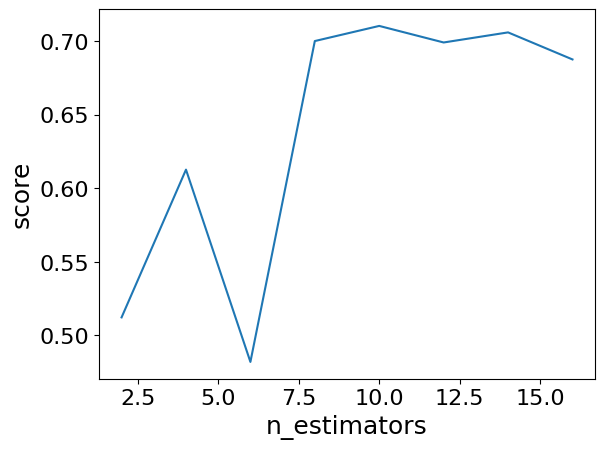

In [171]:
estimator_range = [2,4,6,8,10,12,14,16]
scores = [0.5121951219512195,0.6126126126126126, 0.48192771084337355, 0.7, 0.7102803738317757,0.6990291262135923, 0.7058823529411765,0.6875000000000001]

plt.plot(estimator_range, scores)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()
